# Jupyter notebook example

## Simple plots

Loading the necessary modules (maybe _numpy_ is superceeded by _scipy_)

In [1]:
import numpy as npy
import scipy as scy
# import sympy as spy
# import timeit

The sine function, $\sin(t)$, and its Fourier-transformation.
$$f_{max}=\frac1{2\Delta t},\quad \Delta f=\frac1{t_{max}}$$

In [31]:
# tmax, t = 200/4, scy.linspace(0,tmax,201)
t = [ i/4 for i in range(201) ]
y = [ npy.sin(t[i]/10*2*npy.pi) for i in range(201) ]
Y = scy.fft(y)
Y = abs(Y[:101])*2/200
f = scy.linspace(0,1/t[1]/2,101)

### Plotting the graphs

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

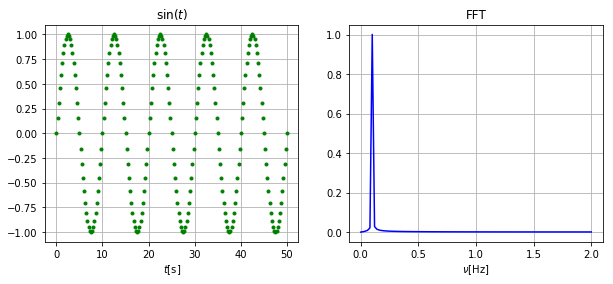

In [35]:
plt.figure(1,figsize=(10,4))
plt.subplot(121)
plt.plot(t,y,'g.')
plt.title('$\sin(t)$')
plt.xlabel('$t$[s]')
plt.grid('on')

plt.subplot(122)
plt.plot(f,Y,'b')
plt.title('FFT')
plt.xlabel(r'$\nu$[Hz]')
plt.grid('on')

plt.show()

```html
<img src="ex_fig_1.svg">
```

## Benchmarking

In [2]:
import time
import timeit

In [4]:
# benchmark from https://devblogs.nvidia.com/drop-in-acceleration-gnu-octave/
N = 8192
# def f(N):
A = scy.single(scy.rand(N,N))
B = scy.single(scy.rand(N,N))
#    return A * B
#tic = time.clock()
#print(tic)
#C = A * B
etime = timeit.timeit('A*B',globals=globals(),number=1)
#toc = time.clock()
#print(toc)
elapsedTime = etime #toc-tic
# elapsedTime = etime(clock(), start);
print("Elapsed time: {0:.2g} sec (".format(elapsedTime))
gFlops = 2*N*N*N/(elapsedTime * 1e+9)
# disp(gFlops);
print("{0:.2f} GFlops)\n".format(gFlops))

Elapsed time: 0.64 sec (
1713.92 GFlops)

